In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import scipy
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import pickle
from scipy import stats

In [4]:
with open('../expname_to_results.p','rb') as F:
    expname_to_sem = pickle.load(F)


with open('../expname_to_accs.p','rb') as F:
    expname_to_accs = pickle.load(F)

In [5]:
# expname_to_accs[
# ]

In [6]:
# expname_to_sem['vit_material_50_not_pretrained_3_handmade_combined_scratch_4_categories__scannet_handmade_cleaned_redone_accuracies.json']

In [7]:
# expname_to_sem['resnet_light_transfer__test_accuracies_epoch_20.json']

In [8]:
def test_significance(sample1, sample2):
    alpha = 0.05  # significance level
    # t_statistic, p_value = stats.ttest_ind(sample1, sample1)
    t_statistic, p_value = stats.ttest_ind_from_stats(nobs1=len(sample1), mean1=np.mean(sample1), std1=np.std(sample1), nobs2=len(sample2), mean2=np.mean(sample2), std2=np.std(sample2))
    if p_value < alpha:
        return True,p_value
    else:
        return p_value

def test_significance_relative(sample1, sample2):
    alpha = 0.05  # significance level
    t_statistic, p_value = stats.ttest_rel(sample1, sample2)
    if p_value < alpha:
        return True,p_value
    else:
        return p_value


def add_significance_bar(x1,x2,y,h,text,line_color='black', text_color='black'):
    plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], lw=1.5, c=line_color)
    plt.text((x1+x2)*.5, y+0.005, text, ha='center', va='bottom', color=text_color,fontsize=24)

In [9]:
import pandas as pd

red = "#e6550d"
green = "#2ca25f"
blue = "#2c7fb8"

# 1: Analysis of target objects under individividual transformations

#### For iLab

In [10]:
# models = ['ResNet','DenseNet','ViT','MobileNetv2']
# viewpoint_vals = [0.46,0.53,0.5,0.3]
# style_vals = [0.36,0.32,0.61,0.57]
# light_vals = [ 0.93, 0.85, 0.78, 0.41]

In [11]:
# sns.set_palette("pastel")

In [12]:
# red= [235/255,99/255,71/255];
# blue = [100/255,149/255,220/255]
# green = [102/255,180/255,0/255]


In [13]:
palette = sns.color_palette("Set3")
sns.set_palette(palette)

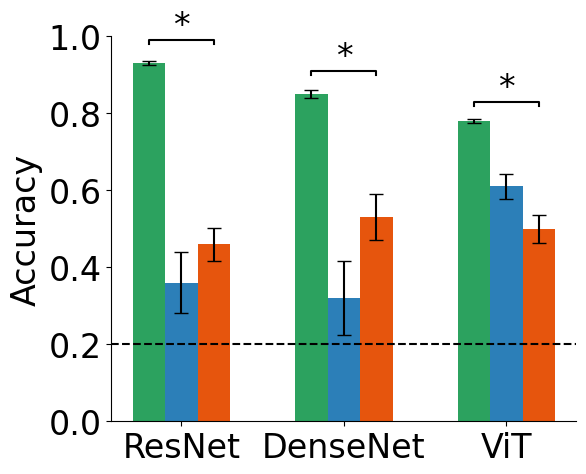

In [14]:
models = ['ResNet','DenseNet','ViT']
light = [ 0.93, 0.85, 0.78]
material = [0.36,0.32,0.61]
viewpoint = [0.46,0.53,0.5]

errs_light =[expname_to_sem['resnet_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['densenet_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['vit_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json']]
errs_material =[expname_to_sem['resnet_style_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['densenet_style_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['vit_style_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json']]
errs_viewpoint =[expname_to_sem['resnet_viewpoints_1_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['densenet_viewpoints_1_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['vit_viewpoints_1_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json']]

plt.figure(figsize=(6,5))
X_axis = np.arange(len(models))

plt.bar(X_axis - 0.2, light, 0.2, yerr = errs_light, label = 'Light',color=green, capsize=5)  
plt.bar(X_axis - 0.0, material, 0.2, yerr = errs_material, label = 'Material',color=blue, capsize=5)  
plt.bar(X_axis + 0.2, viewpoint, 0.2, yerr = errs_viewpoint, label = 'Viewpoint',color=red, capsize=5)  

add_significance_bar(-0.2,0.2,0.98,0.01,'*')
add_significance_bar(0.8,1.2,0.9,0.01,'*')
add_significance_bar(1.8,2.2,0.82,0.01,'*')

random_chance = 1/5
plt.axhline(y=random_chance, color='black', linestyle='--', label='Chance')

sns.despine()
plt.xticks(X_axis, models,fontsize=24)
plt.yticks(fontsize=24)
plt.ylabel("Accuracy", fontsize=24)
plt.ylim(0,1)
# plt.title("Generalization  under \n unseen transformations in SemanticDG dataset", fontsize=24)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=3, fontsize=20, columnspacing=0.5)
plt.savefig('paper_figures/ilab_single_transformations_1_by_5.pdf',bbox_inches='tight')
plt.show()

In [15]:
test_significance_relative(expname_to_accs['vit_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'],expname_to_accs['vit_viewpoints_1_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'])

(True, 0.0002646142462916143)

In [16]:
test_significance_relative(expname_to_accs['densenet_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'],expname_to_accs['densenet_viewpoints_1_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'])

(True, 0.0008971654532785585)

In [17]:
test_significance_relative(expname_to_accs['resnet_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'],expname_to_accs['resnet_viewpoints_1_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'])

(True, 1.6346487532314703e-06)

In [18]:
test_significance_relative(expname_to_accs['resnet_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'],expname_to_accs['resnet_style_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'])



(True, 1.6931183108375306e-06)

In [19]:


# X_axis = np.arange(len(models))
  
# plt.bar(X_axis - 0.3, viewpoint_vals, 0.2, label = 'Viewpoint',color='red')
# plt.bar(X_axis - 0.1, style_vals, 0.2, label = 'Material',color='blue')
# plt.bar(X_axis + 0.1, light_vals, 0.2, label = 'Light',color='green')
# sns.despine()
# plt.xticks(X_axis, models,fontsize=20, rotation=0)
# plt.ylabel("Accuracy", fontsize=20)
# #plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, fontsize=15)
# plt.savefig('paper_figures/ilab_single_transformations_1_by_5.pdf',bbox_inches='tight')
# plt.show()

In [20]:
# models = ['ResNet','DenseNet','ViT','MobileNet']
# viewpoint_vals = [ 0.434918, 0.519981, 0.543750, 0.313215]
# style_vals = [ 0.939987, 0.881514, 0.889120, 0.777070]
# light_vals = [ 0.98, 0.95, 0.88, 0.82]

# X_axis = np.arange(len(models))
  
# plt.bar(X_axis - 0.3, viewpoint_vals, 0.2, label = 'Viewpoint',color='red')
# plt.bar(X_axis - 0.1, style_vals, 0.2, label = 'Material',color='blue')
# plt.bar(X_axis + 0.1, light_vals, 0.2, label = 'Light',color='green')
# sns.despine()
# plt.xticks(X_axis, models,fontsize=14)
# plt.ylabel("Accuracy", fontsize=20)
# # plt.title("Generalization performance under \n unseen transformations in iLab dataset", fontsize=24)
# plt.legend()
# plt.savefig('paper_figures/ilab_single_transformations.pdf',bbox_inches='tight')
# plt.show()

#### For SemanticDG

In [21]:
# models = ['ResNet','DenseNet','ViT','MobileNetv2']
# viewpoint = [0.63, 0.68, 0.77, 0.64]
# material = [0.64, 0.69, 0.78,  0.65]
# light = [0.85, 0.85, 0.91,0.8]

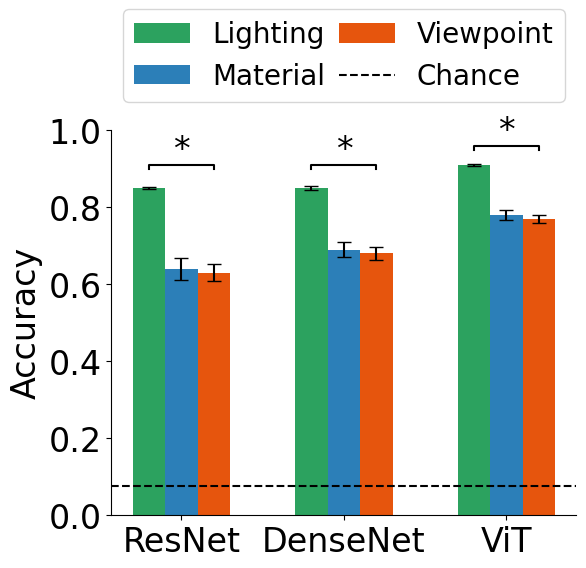

In [22]:
# models = ['ResNet','DenseNet','ViT']
light = [0.85, 0.85, 0.91]
material = [0.64, 0.69, 0.78]
viewpoint = [0.63, 0.68, 0.77]



errs_light =[expname_to_sem['resnet_light_transfer__test_accuracies_epoch_20.json'], expname_to_sem['densenet_light_transfer__test_accuracies_epoch_20.json'], expname_to_sem['vit_light_transfer__test_accuracies_epoch_10.json']]
errs_material =[expname_to_sem['resnet_material_transfer__test_accuracies_epoch_20.json'], expname_to_sem['densenet_material_transfer__test_accuracies_epoch_20.json'], expname_to_sem['vit_material_transfer__test_accuracies_epoch_10.json']]
errs_viewpoint =[expname_to_sem['resnet_viewpoint_transfer__test_accuracies_epoch_20.json'], expname_to_sem['densenet_viewpoint_transfer__test_accuracies_epoch_20.json'], expname_to_sem['vit_viewpoint_transfer__test_accuracies_epoch_10.json']]


plt.figure(figsize=(6,5))
X_axis = np.arange(len(models))
random_chance = [1/13]*4
plt.bar(X_axis - 0.2, light, 0.2, label = 'Lighting',color=green, yerr = errs_light, capsize=5)
plt.bar(X_axis - 0.0, material, 0.2, label = 'Material',color=blue, yerr = errs_material, capsize=5)
plt.bar(X_axis + 0.2, viewpoint, 0.2, label = 'Viewpoint',color=red, yerr = errs_viewpoint, capsize=5)

add_significance_bar(-0.2,0.2,0.9,0.01,'*')
add_significance_bar(0.8,1.2,0.9,0.01,'*')
add_significance_bar(1.8,2.2,0.95,0.01,'*')

random_chance = 1/13
plt.axhline(y=random_chance, color='black', linestyle='--', label='Chance')

# Rearrange the handles and labels in the desired order

# Create a new legend with the rearranged handles and labels
# plt.legend(handles, labels, title='Legend')

sns.despine()
plt.xticks(X_axis, models,fontsize=24)
plt.yticks(fontsize=24)
plt.ylabel("Accuracy", fontsize=24)
plt.ylim(0,1)
# plt.title("Generalization  under \n unseen transformations in SemanticDG dataset", fontsize=24)
handles = plt.gca().get_legend_handles_labels()
handles, labels = plt.gca().get_legend_handles_labels()
new_order = [1,2,3, 0]  # Change the order as needed
new_handles = [handles[i] for i in new_order]
new_labels = [labels[i] for i in new_order]
plt.legend(new_handles, new_labels, loc='upper center', bbox_to_anchor=(0.5, 1.35),ncol=2, fontsize=20, columnspacing=0.5)
plt.savefig('paper_figures/semanticdg_single_transformations.pdf',bbox_inches='tight')
plt.show()

In [23]:
test_significance_relative(expname_to_accs['resnet_light_transfer__test_accuracies_epoch_20.json'], expname_to_accs['resnet_viewpoint_transfer__test_accuracies_epoch_20.json'])

(True, 8.448820510804135e-06)

In [24]:
test_significance_relative(expname_to_accs['resnet_light_transfer__test_accuracies_epoch_20.json'], expname_to_accs['resnet_material_transfer__test_accuracies_epoch_20.json'])



(True, 3.810545034940442e-05)

In [25]:
test_significance_relative(expname_to_accs['vit_light_transfer__test_accuracies_epoch_10.json'], expname_to_accs['vit_viewpoint_transfer__test_accuracies_epoch_10.json'])

(True, 3.6132188147480845e-06)

In [26]:
test_significance_relative(expname_to_accs['densenet_light_transfer__test_accuracies_epoch_20.json'], expname_to_accs['densenet_viewpoint_transfer__test_accuracies_epoch_20.json'])

(True, 1.0119678691518642e-05)

# Diversity Plots

## Semantic iLab

In [27]:
light_vals = [0.93, 0.95, 1.0, 1.0]
mat_vals = [0.36, 0.78, 0.91, 0.96]
viewpoint_vals = [0.46, 0.68, 0.64, 0.75]

random_chance = [1/5]*4
errs_light =[expname_to_sem['resnet_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_light_2_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_light_3_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_light_4_by_5_target_not_pretrained__test_accuracies_epoch_50.json']]
errs_material =[expname_to_sem['resnet_style_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_style_2_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_style_3_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_style_4_by_5_target_not_pretrained__test_accuracies_epoch_50.json']]
errs_viewpoint =[expname_to_sem['resnet_viewpoints_1_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_viewpoints_2_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_viewpoints_3_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_viewpoints_4_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json']]

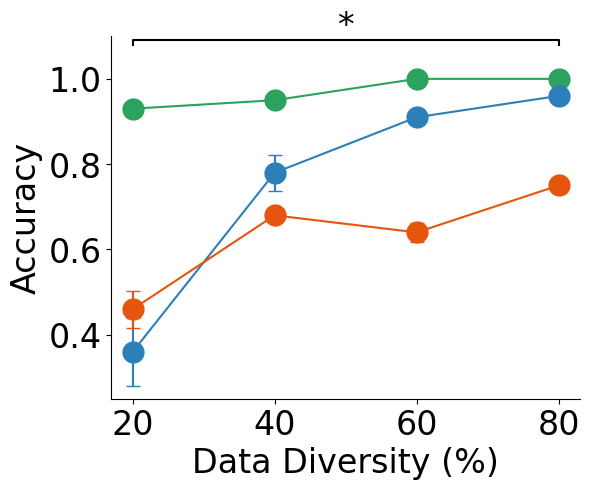

In [28]:
plt.figure(figsize=(6,5))
plt.errorbar(range(0,4), light_vals, marker='o',color=green, markersize=15, label='Lighting', yerr=errs_light, capsize=5)
plt.errorbar(range(0,4), mat_vals, marker='o',color=blue, markersize=15, label='Material', yerr=errs_material, capsize=5)
plt.errorbar(range(0,4), viewpoint_vals, marker='o',color=red, markersize=15, label='Viewpoint', yerr=errs_viewpoint, capsize=5)
# plt.plot(range(0,4), random_chance, linestyle='dashed',label='random chance',color='black', marker='o')

plt.ylim(0.25,1.1)
# plt.title('Generalization to OOD domains',fontsize=18, y=1.12);
plt.xlabel('Data Diversity (%)', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
# plt.legend(loc='lower right', bbox_to_anchor=(0.5, 1.2),ncol=3, fontsize=20, columnspacing=0.5)
# plt.legend(loc="lower right", fontsize=16,ncol=1)
plt.xticks(ticks = range(4), labels = [20,40,60,80], fontsize=24)
plt.yticks(ticks = [0.4, 0.6, 0.8, 1.0], labels = [0.4, 0.6, 0.8, 1.0], fontsize=24)

add_significance_bar(0,3,1.08,0.01,'*')
# add_significance_bar(0,3,1.04,0.01,'*',line_color=blue,text_color=blue)
# add_significance_bar(0,3,1.08,0.01,'*',line_color=red,text_color=red)

sns.despine()
plt.tight_layout()
plt.savefig('paper_figures/ilab_data_diversity.pdf', bbox_inches='tight')
plt.show()

In [29]:
# from scipy.stats import linregress

# test_result = linregress(viewpoint_vals, list(range(len(viewpoint_vals))))
# test_result

In [30]:
# def test_slope_significance(list_of_points):
    

In [31]:
test_significance_relative(expname_to_accs['resnet_light_4_by_5_target_not_pretrained__test_accuracies_epoch_50.json'],expname_to_accs['resnet_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'])

(True, 0.0032460899374346544)

In [32]:
test_significance_relative(expname_to_accs['resnet_style_4_by_5_target_not_pretrained__test_accuracies_epoch_50.json'],expname_to_accs['resnet_style_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'])

(True, 5.249667348211418e-07)

In [33]:
test_significance_relative(expname_to_accs['resnet_viewpoints_4_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'],expname_to_accs['resnet_viewpoints_1_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'])

(True, 0.00010675221716382437)

In [34]:
material_improvement = np.array(expname_to_accs['resnet_light_4_by_5_target_not_pretrained__test_accuracies_epoch_50.json']) - np.array(expname_to_accs['resnet_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'])
viewpoint_improvement = np.array(expname_to_accs['resnet_style_4_by_5_target_not_pretrained__test_accuracies_epoch_50.json']) - np.array(expname_to_accs['resnet_style_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'])
light_improvement = np.array(expname_to_accs['resnet_viewpoints_4_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json']) - np.array(expname_to_accs['resnet_viewpoints_1_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'])

In [35]:
test_significance_relative(material_improvement, light_improvement)

(True, 0.0020663597875410426)

In [36]:
test_significance_relative(material_improvement, viewpoint_improvement)

(True, 1.50147097151561e-06)

## SSIC

In [37]:
### These values are for CTCNET and were removed for better workflow

# light_vals = [0.9305368661880493,
#  0.9750208258628845,
#  0.9838259220123291,
#  0.9860092997550964]

# viewpoint_vals = [0.7253805994987488,
#  0.7416310906410217,
#  0.7823638319969177,
#  0.8224554061889648]

# mat_vals = [0.7619353532791138,
#  0.8367480635643005,
#  0.8892835378646851,
#  0.9061455130577087]

# random_chance = [1/13]*4


# errs_light =[expname_to_sem['one_hotswapped_light_50__unseen_lights_accuracies.json'], expname_to_sem['one_hotswapped_light_50__unseen_lights_accuracies.json'], expname_to_sem['two_hotswapped_light_50__unseen_lights_accuracies.json'], expname_to_sem['three_hotswapped_light_50__unseen_lights_accuracies.json']]
# errs_material =[expname_to_sem['1_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['1_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['2_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['3_style_hotswapped_material_50__unseen_materials_accuracies.json']]
# errs_viewpoint =[expname_to_sem['lower_bound_viewpoints_0_1__unseen_viewpoints_accuracies.json'], expname_to_sem['viewpoint_hotswapped_1__unseen_viewpoints_accuracies.json'], expname_to_sem['viewpoint_hotswapped_2__unseen_viewpoints_accuracies.json'], expname_to_sem['viewpoint_hotswapped_3__unseen_viewpoints_accuracies.json']]


### These values are for ResNet for better workflow
light_vals = [0.85, 0.92, 0.93, 0.94]
mat_vals = [0.64, 0.8, 0.85, 0.89]
viewpoint_vals = [0.63, 0.67, 0.71, 0.73]

random_chance = [1/5]*4
errs_light =[expname_to_sem['resnet_light_transfer__test_accuracies_epoch_20.json'], expname_to_sem['resnet_1_style_hotswapped_light_50__unseen_lights_accuracies.json'], expname_to_sem['resnet_2_style_hotswapped_light_50__unseen_lights_accuracies.json'], expname_to_sem['resnet_3_style_hotswapped_light_50__unseen_lights_accuracies.json']]
errs_material =[expname_to_sem['resnet_material_transfer__test_accuracies_epoch_20.json'], expname_to_sem['resnet_1_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['resnet_2_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['resnet_3_style_hotswapped_material_50__unseen_materials_accuracies.json']]
errs_viewpoint =[expname_to_sem['resnet_viewpoint_transfer__test_accuracies_epoch_20.json'], expname_to_sem['resnet_1_style_hotswapped_viewpoints_50__unseen_viewpoints_accuracies.json'], expname_to_sem['resnet_2_style_hotswapped_viewpoints_50__unseen_viewpoints_accuracies.json'], expname_to_sem['resnet_3_style_hotswapped_viewpoints_50__unseen_viewpoints_accuracies.json']]

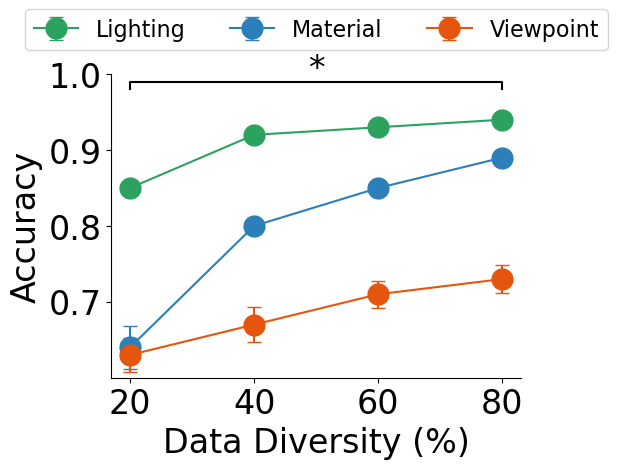

In [38]:
plt.figure(figsize=(6,5))
plt.errorbar(range(0,4), light_vals, marker='o',color=green, markersize=15, label='Lighting', yerr=errs_light, capsize=5)
plt.errorbar(range(0,4), mat_vals, marker='o',color=blue, markersize=15, label='Material', yerr=errs_material, capsize=5)
plt.errorbar(range(0,4), viewpoint_vals, marker='o',color=red, markersize=15, label='Viewpoint', yerr=errs_viewpoint, capsize=5)

# plt.plot(range(0,4), random_chance, linestyle='dashed',label='random chance',color='black', marker='o')
plt.ylim(0.6,1)
# plt.title('Generalization to OOD domains',fontsize=18, y=1.12);
plt.xlabel('Data Diversity (%)', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
# plt.legend(loc='lower right', bbox_to_anchor=(0.5, 1.2),ncol=3, fontsize=20, columnspacing=0.5)

add_significance_bar(0,3,0.98,0.01,'*')

plt.legend(loc="upper center", fontsize=16,ncol=3, bbox_to_anchor=(0.5,1.25))
plt.xticks(ticks = range(4), labels = [20,40,60,80], fontsize=24)
plt.yticks(ticks = [0.7, 0.8, 0.9, 1.0], labels = [0.7, 0.8, 0.9, 1.0], fontsize=24)
sns.despine()
plt.tight_layout()
plt.savefig('paper_figures/semanticdg_data_diversity.pdf', bbox_inches='tight')
plt.show()

In [39]:
test_significance_relative(expname_to_accs['resnet_light_transfer__test_accuracies_epoch_20.json'],expname_to_accs['resnet_3_style_hotswapped_light_50__unseen_lights_accuracies.json'])

(True, 6.187869973096173e-06)

In [40]:
test_significance_relative(expname_to_accs['resnet_material_transfer__test_accuracies_epoch_20.json'],expname_to_accs['resnet_3_style_hotswapped_material_50__unseen_materials_accuracies.json'])

(True, 2.0083403218107423e-05)

In [41]:
test_significance_relative(expname_to_accs['resnet_viewpoint_transfer__test_accuracies_epoch_20.json'],expname_to_accs['resnet_3_style_hotswapped_viewpoints_50__unseen_viewpoints_accuracies.json'])

(True, 1.0113279507654373e-06)

In [42]:
material_improvement = np.array(expname_to_accs['resnet_3_style_hotswapped_material_50__unseen_materials_accuracies.json']) - np.array(expname_to_accs['resnet_material_transfer__test_accuracies_epoch_20.json'])
viewpoint_improvement = np.array(expname_to_accs['resnet_3_style_hotswapped_viewpoints_50__unseen_viewpoints_accuracies.json']) - np.array(expname_to_accs['resnet_viewpoint_transfer__test_accuracies_epoch_20.json'])
light_improvement = np.array(expname_to_accs['resnet_3_style_hotswapped_light_50__unseen_lights_accuracies.json']) - np.array(expname_to_accs['resnet_light_transfer__test_accuracies_epoch_20.json'])

In [43]:
material_improvement

array([0.22493994, 0.45900646, 0.20739633, 0.40370059, 0.22401708,
       0.26877236, 0.10778564, 0.19819528, 0.2761569 , 0.42132565,
       0.31277531, 0.03500921, 0.06645447])

In [44]:
viewpoint_improvement

array([0.09262645, 0.09870389, 0.06456614, 0.12058467, 0.04156679,
       0.10917029, 0.054371  , 0.0508039 , 0.09650052, 0.14685312,
       0.06329113, 0.05214947, 0.13107824])

In [45]:
test_significance_relative(material_improvement, viewpoint_improvement)

(True, 0.00041168546380376656)

In [46]:
test_significance_relative(material_improvement, light_improvement)

(True, 0.0002038254687680494)

# Data Augmentation Plots

In [47]:
twenty = [0.46, 0.36, 0.93]
aug = [0.51, 0.3, 0.96]
eighty = [0.75, 0.96, 1]

aug = [0.96, 0.3,0.51]
eighty = [1,0.96, 0.75]

errs_aug =[expname_to_sem['resnet_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_style_1_by_5_target_not_pretrained_geometric_color__test_accuracies_epoch_50.json'], expname_to_sem['resnet_viewpoints_1_by_5_repeat_target_not_pretrained_geometric_color__test_accuracies_epoch_50.json']]
errs_eighty =[expname_to_sem['resnet_light_4_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_style_4_by_5_target_not_pretrained__test_accuracies_epoch_50.json'], expname_to_sem['resnet_viewpoints_4_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json']]



x = np.arange(3)

W = 0.2

import seaborn as sns

In [48]:
orange = [236/255, 151/255, 31/255]
gray = '#636363'

In [49]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


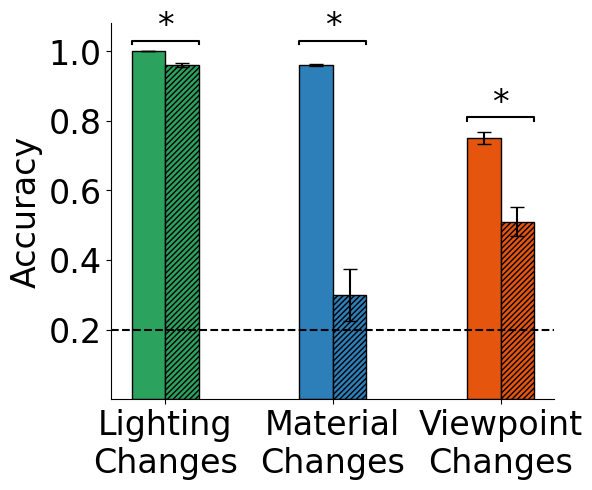

In [50]:
plt.figure(figsize=(6,5))
plt.bar(x-W/2, eighty,width=W,color=[green, blue,red],edgecolor = "black", yerr=errs_eighty, capsize=5)
plt.bar(x+W/2, aug,width=W, color=[green, blue,red],hatch='//////',edgecolor = "black", yerr=errs_aug, capsize=5)
sns.despine()
plt.ylabel('Accuracy',fontsize=24)
plt.yticks(ticks = [0.2, 0.4, 0.6, 0.8, 1.0], labels = [0.2, 0.4, 0.6, 0.8, 1.0], fontsize=24)
plt.xticks([0, 1, 2],labels=['Lighting\nChanges', 'Material\nChanges', 'Viewpoint\nChanges'],fontsize=24)


random_chance = 1/5
plt.axhline(y=random_chance, color='black', linestyle='--', label='Chance')

add_significance_bar(-0.2,0.2,1.02,0.01,'*')
add_significance_bar(1-0.2,1+0.2,1.02,0.01,'*')
add_significance_bar(2-0.2,2+0.2,0.8,0.01,'*')
# plt.legend(handles=legend_handles)
# plt.legend(["20%+Data Aug.", "80%"], loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3, fontsize=20, columnspacing=0.5,handletextpad=0.2)
plt.tight_layout()
plt.savefig('paper_figures/ilab_data_diversity_vs_data_augmentations.pdf', bbox_inches='tight')
plt.show()

In [51]:
test_significance_relative(expname_to_accs['resnet_light_1_by_5_target_not_pretrained__test_accuracies_epoch_50.json'],expname_to_accs['resnet_light_4_by_5_target_not_pretrained__test_accuracies_epoch_50.json'])

(True, 0.0032460899374346544)

In [52]:
test_significance_relative(expname_to_accs['resnet_style_1_by_5_target_not_pretrained_geometric_color__test_accuracies_epoch_50.json'],expname_to_accs['resnet_style_4_by_5_target_not_pretrained__test_accuracies_epoch_50.json'])

(True, 1.3132138558677705e-07)

In [53]:
test_significance_relative(expname_to_accs['resnet_viewpoints_1_by_5_repeat_target_not_pretrained_geometric_color__test_accuracies_epoch_50.json'],expname_to_accs['resnet_viewpoints_4_by_5_repeat_target_not_pretrained__test_accuracies_epoch_50.json'])

(True, 2.709747766642042e-05)

# SemanticDG

In [54]:
forty = [0.7, 0.82, 0.96]
aug = [0.50, 0.65,0.8]
eighty = [0.82, 0.94, 0.98]

aug = [0.8,0.65,0.5]
eighty = [0.98, 0.94,0.82]
errs_aug =[expname_to_sem['one_hotswapped_light_50_geometric_color__test_accuracies_epoch_40.json'], expname_to_sem['1_style_hotswapped_material_50_geometric_color__test_accuracies_epoch_40.json'], expname_to_sem['viewpoint_hotswapped_1_repeated_geometric_color__test_accuracies_epoch_40.json']]
errs_eighty =[expname_to_sem['three_hotswapped_light_50__unseen_lights_accuracies.json'], expname_to_sem['4_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['viewpoint_hotswapped_3__unseen_viewpoints_accuracies.json']]


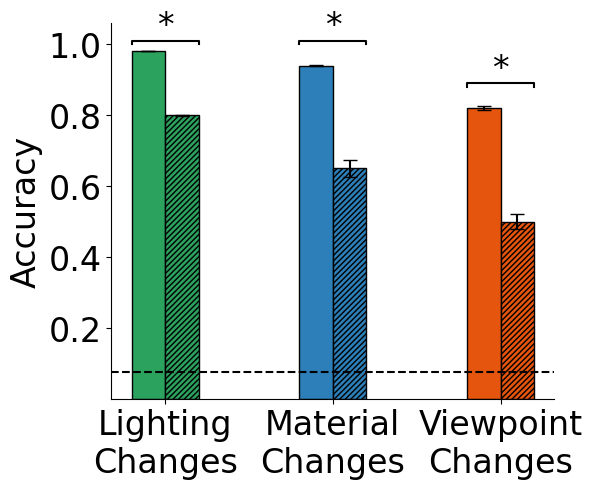

In [55]:
# plt.bar(x-W, forty,width=W, color='orange')
plt.figure(figsize=(6,5))

legend_handles = []
legend_handles.append(mpatches.Patch(facecolor='white', hatch='', label='80% Real-World Transformational \n Diversity(RWTD)',edgecolor='black'))
legend_handles.append(mpatches.Patch(facecolor='white', hatch='//////', label='20% RWTD + Data Aug.',edgecolor='black'))

plt.bar(x-W/2, eighty,width=W,color=[green, blue,red],edgecolor = "black", yerr=errs_eighty,capsize=5)
plt.bar(x+W/2, aug,width=W, color=[green, blue,red],hatch='//////',edgecolor = "black", yerr=errs_aug, capsize=5)

# plt.bar(x-W/2, aug,width=W,color=orange)
# plt.bar(x+W/2, eighty,width=W,color=gray)
sns.despine()
# plt.title('Data Augmentations vs \nHuman-like Data Diversity (SemanticDG)',fontsize=20)
plt.ylabel('Accuracy',fontsize=24)
plt.yticks(ticks = [0.2, 0.4, 0.6, 0.8, 1.0], labels = [0.2, 0.4, 0.6, 0.8, 1.0], fontsize=24)
plt.xticks([0, 1, 2],labels=['Lighting\nChanges', 'Material\nChanges', 'Viewpoint\nChanges'],fontsize=24)# plt.legend(handles=legend_handles)
# legend = plt.legend(handles=legend_handles,fontsize=12,ncol=1,loc='upper center')
# legend.set_bbox_to_anchor((0.5, 1.4))
# plt.legend(["20%+Data Aug.", "80%"], loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3, fontsize=20, columnspacing=0.5,handletextpad=0.2)

random_chance = 1/13
plt.axhline(y=random_chance, color='black', linestyle='--', label='Chance')

add_significance_bar(-0.2,0.2,1,0.01,'*')
add_significance_bar(1-0.2,1+0.2,1,0.01,'*')
add_significance_bar(2-0.2,2+0.2,0.88,0.01,'*')

plt.tight_layout()
plt.savefig('paper_figures/semanticdg_data_diversity_vs_data_augmentations.pdf', bbox_inches='tight')
plt.show()

In [56]:
test_significance_relative(expname_to_accs['one_hotswapped_light_50_geometric_color__test_accuracies_epoch_40.json'],expname_to_accs['three_hotswapped_light_50__unseen_lights_accuracies.json'])

(True, 0.00010914052881839066)

In [57]:
test_significance_relative(expname_to_accs['1_style_hotswapped_material_50_geometric_color__test_accuracies_epoch_40.json'],expname_to_accs['4_style_hotswapped_material_50__unseen_materials_accuracies.json'])


(True, 2.184842798455412e-05)

In [58]:
test_significance_relative(expname_to_accs['viewpoint_hotswapped_1_repeated_geometric_color__test_accuracies_epoch_40.json'],expname_to_accs['viewpoint_hotswapped_3__unseen_viewpoints_accuracies.json'])

(True, 8.691958521334802e-06)

# Converting tables to figures

In [59]:
# # control_1 : blurring context
# # viewpoint = [0.82, 0.77, 0.76]
# # material = [0.94, 0.88, 0.83]
# # light = [0.98, 0.96, 0.94]

# full_context = [0.82, 0.94, 0.98]
# less_context = [0.77, 0.88, 0.96]
# least_context = [0.76, 0.83, 0.94]
# x = np.arange(3)
# W = 0.2

# # plt.bar(x-W, forty,width=W, color='orange')
# plt.bar(x-W, full_context,width=W,color=orange)
# plt.bar(x, less_context,width=W,color=gray)
# plt.bar(x+W, least_context,width=W,color="black")
# sns.despine()
# # plt.title('Data Augmentations vs \nHuman-like Data Diversity (SemanticDG)',fontsize=20)
# plt.ylabel('Accuracy',fontsize=24)
# plt.yticks(ticks = [0.2, 0.4, 0.6, 0.8, 1.0], labels = [0.2, 0.4, 0.6, 0.8, 1.0], fontsize=24)
# plt.xticks([0, 1, 2],labels=['Viewpoint\nShift', 'Material\nShift', 'Light\nShift'],fontsize=24)
# plt.legend(["Full Context", "Less Context", "Least Context"], loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3, fontsize=13, columnspacing=0.5,handletextpad=0.2)
# plt.tight_layout()
# # plt.savefig('paper_figures/impact_of_context.pdf', bbox_inches='tight')
# plt.show()

### Generalization to ScanNet

In [60]:
def sort_results(list1, list2):
    zipped_pairs = zip(list2, list1)
    z = [x for _, x in sorted(zipped_pairs)]
    return z

In [66]:
archs = ['ResNet', 'ViT', 'ANDMask', 'CAD', 'CORAL', 'ERM', 'MTL', 'SelfReg','VREX', 'CRTNet', 'HDNet (Ours)']
# archs = archs[2:]
scannet_accuracies = [0.35,0.36,0.50,0.48,0.45,0.49,0.49,0.44,0.45,0.51,0.69]
# scannet_accuracies = scannet_accuracies[2:]
scannet_errors = [expname_to_sem['resnet_material_50_not_pretrained_3_handmade_combined_scratch_4_categories_geometric_color__scannet_handmade_cleaned_redone_accuracies.json'],
                  expname_to_sem['vit_material_50_not_pretrained_3_handmade_combined_scratch_4_categories_geometric_color__scannet_handmade_cleaned_redone_accuracies.json'],
                  0.07,0.06,0.04,0.07,0.08,0.03,0.04,
                  expname_to_sem['lower_bound_material_50_not_pretrained_3_handmade_combined_scratch_4_categories__scannet_handmade_cleaned_redone_accuracies.json'],
                  expname_to_sem['4_style_hotswapped_material_50_and_lights_not_pretrained_3_handmade_combined_scratch_4_categories__scannet_handmade_cleaned_redone_accuracies.json']]
# scannet_errors = scannet_errors[2:]

In [67]:
archs = sort_results(archs, scannet_accuracies)

In [68]:
scannet_accuracies = sorted(scannet_accuracies)

In [69]:
palette = ['gray']*10 + ["#CF597E"]

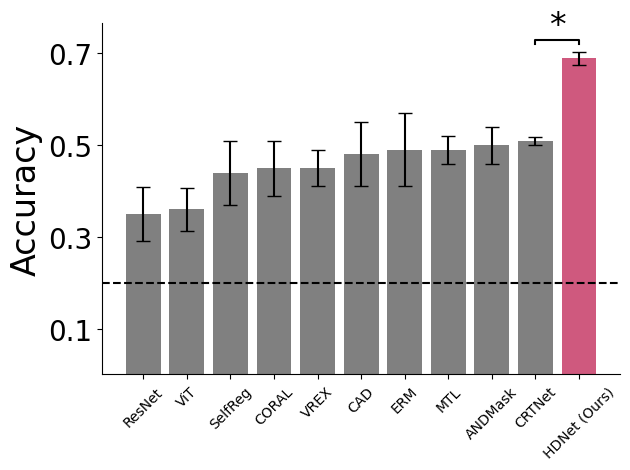

In [70]:
import numpy as np
import seaborn as sns

values = scannet_accuracies
idx = archs
x = list(range(len(idx)))
W=0.8
clrs = ['grey' if (x < max(values)) else 'red' for x in values ]

plt.ylabel('Accuracy',fontsize=24)
# plt.title('Generalization from synthetic to \n natural image data', fontsize=24)
plt.yticks(ticks = [0.1, 0.3, 0.5, 0.7, 0.9], labels = [0.1, 0.3, 0.5, 0.7, 0.9], fontsize=20)
plt.xticks(list(range(len(archs))),labels=archs,fontsize=10,rotation=45)
plt.bar(x, scannet_accuracies,width=W,color=palette,yerr=scannet_errors,capsize=5)

random_chance = 1/5
plt.axhline(y=random_chance, color='black', linestyle='--', label='Chance')

add_significance_bar(9,10, 0.72,0.01,'*')

sns.despine()
plt.tight_layout()
plt.savefig('paper_figures/generalization_to_scannet.pdf', bbox_inches='tight')




plt.show()
# sns.barplot(x=idx, y=values, palette=clrs)

In [71]:
with open('../DomainBed/DGToScanNet_SINGLE/CAD/class_accs.p','rb') as F:
    cad_accs = pickle.load(F)

In [72]:
# test_significance(ctcnet_accuracies, cad_accs)

In [73]:
ctcnet_accuracies = list({"chair": 0.75, "desk": 0.83, "sofa": 0.52, "table": 0.66}.values())

In [74]:
crtnet_accuracies = list({"chair": 0.51, "desk": 0.5, "sofa": 0.37, "table": 0.64}.values())

In [75]:
scipy.stats.ranksums(ctcnet_accuracies, crtnet_accuracies)

RanksumsResult(statistic=2.0207259421636903, pvalue=0.043308142810791955)

In [76]:
scipy.stats.ranksums(ctcnet_accuracies, crtnet_accuracies)

RanksumsResult(statistic=2.0207259421636903, pvalue=0.043308142810791955)

In [77]:
scipy.stats.ranksums(ctcnet_accuracies, expname_to_accs['vit_material_50_not_pretrained_3_handmade_combined_scratch_4_categories_geometric_color__scannet_handmade_cleaned_redone_accuracies.json'])


RanksumsResult(statistic=2.0207259421636903, pvalue=0.043308142810791955)

In [78]:
scipy.stats.ranksums(ctcnet_accuracies, expname_to_accs['resnet_material_50_not_pretrained_3_handmade_combined_scratch_4_categories_geometric_color__scannet_handmade_cleaned_redone_accuracies.json'])


RanksumsResult(statistic=1.7320508075688774, pvalue=0.0832645166635504)

In [79]:
scipy.stats.ranksums(ctcnet_accuracies, crtnet_accuracies)

RanksumsResult(statistic=2.0207259421636903, pvalue=0.043308142810791955)

In [80]:
# crtnet_4 = list({"chair": 0.43558281660079956, "desk": 0.6666666865348816, "sofa": 0.2830188572406769, "table": 0.5357142686843872}.values())
# test_significance(expname_to_accs['4_style_hotswapped_material_50_and_lights_not_pretrained_3_handmade_combined_scratch_4_categories__scannet_handmade_cleaned_redone_accuracies.json'],
#                                                             crtnet_4)

In [81]:
scipy.stats.ranksums(ctcnet_accuracies,cad_accs)

RanksumsResult(statistic=1.7320508075688774, pvalue=0.0832645166635504)

### Generalization on HVD

In [82]:
viewpoints = [0.75, 0.77, 0.79, 0.78, 0.76, 0.78, 0.76, 0.78, 0.65, 0.79, 0.82]
materials  = [0.75, 0.75, 0.75, 0.75, 0.74, 0.74, 0.74, 0.75, 0.78, 0.76, 0.94]
lights = [0.82, 0.8, 0.81, 0.8, 0.83, 0.81, 0.75, 0.83, 0.95, 0.93, 0.98]
palettes = ['black']*10 + ["#CF597E"]

In [100]:
archs = ['ANDMask', 'CAD', 'CORAL', 'ERM', 'IRM', 'MTL', 'SelfReg', 'VREx', 'FasterRCNN', 'CRTNet', 'HDNet (Ours)']

In [101]:
chosen_numbers = [3,4,9,10]

In [102]:
arch = [archs[i] for i in chosen_numbers]
viewpoint = [viewpoints[i] for i in chosen_numbers]
material = [materials[i] for i in chosen_numbers]
light = [lights[i] for i in chosen_numbers]

In [103]:
arch = sort_results(archs, viewpoint)
viewpoint = sort_results(viewpoint, viewpoint)
material = sort_results(material, viewpoint)
light = sort_results(light, viewpoint)


In [104]:
accs_vi = [0.8448100686073303, 
0.6355932354927063,
0.788223147392273,
0.799634575843811,
0.8337330222129822,
0.7583697438240051,
0.8599857687950134,
0.8424437046051025,
0.8133615851402283,
0.8269230723381042,
0.7848101258277893,
0.9628725051879883,
0.9423134922981262]

In [105]:
crtnet_viewpoints = np.array(list({"table": 0.7131830453872681, "desk": 0.6490528583526611, "bookshelf": 0.7629132270812988, "sofa": 0.7161997556686401, "trash_bin": 0.7969624400138855, "bed": 0.715429425239563, "chair": 0.89552241563797, "monitor": 0.881028950214386, "bathtub": 0.7550371289253235, "file_cabinet": 0.6555944085121155, "flowerpot": 0.7594936490058899, "window": 0.9644601941108704, "lamp": 0.9628511071205139}.values()))

In [106]:
ctcnet_viewpoints = np.array(list({"table": 0.8328255414962769, "desk": 0.5942173600196838, "bookshelf": 0.7933884263038635, "sofa": 0.8617539405822754, "trash_bin": 0.8553157448768616, "bed": 0.7176128029823303, "chair": 0.8927978873252869, "monitor": 0.8469453454017639, "bathtub": 0.858960747718811, "file_cabinet": 0.7220279574394226, "flowerpot": 0.8227847814559937, "window": 0.9678798317909241, "lamp": 0.9622470736503601}.values()))

In [107]:
errs_light = [0.02,0.02,0.02,0.001]
errs_material = [0.06,0.04,0.06,0.001]
errs_viewpoint = [0.04,0.04,np.var(crtnet_viewpoints),np.var(ctcnet_viewpoints)]

In [108]:
test_significance_relative(crtnet_viewpoints, ctcnet_viewpoints)

(True, 0.04045181898938321)

In [109]:
# accs_vi = [0.8442006707191467,
#  0.5802592039108276,
#  0.8269628286361694,
#  0.7862362861633301,
#  0.8585131764411926,
#  0.7103347778320312,
#  0.9263207912445068,
#  0.8051446676254272,
#  0.8324496150016785,
#  0.6206293702125549,
#  0.797468364238739,
#  0.9546898007392883,
#  0.9592268466949463]

In [110]:
from scipy.stats import sem

In [111]:
# np.var(accs_vi)

In [112]:
# palette

In [113]:
palette = ['lightgray','gray','dimgray','#CF597E']

In [114]:
legend_handles = []
legend_handles.append(mpatches.Patch(facecolor='white', hatch='x', label=archs[chosen_numbers[0]],edgecolor='black'))
legend_handles.append(mpatches.Patch(facecolor='white', hatch='+', label=archs[chosen_numbers[1]],edgecolor='black'))
legend_handles.append(mpatches.Patch(facecolor='white', hatch='.', label=archs[chosen_numbers[2]],edgecolor='black'))
legend_handles.append(mpatches.Patch(facecolor='white', hatch='', label=archs[chosen_numbers[3]],edgecolor='black'))

In [115]:
# accs_vi

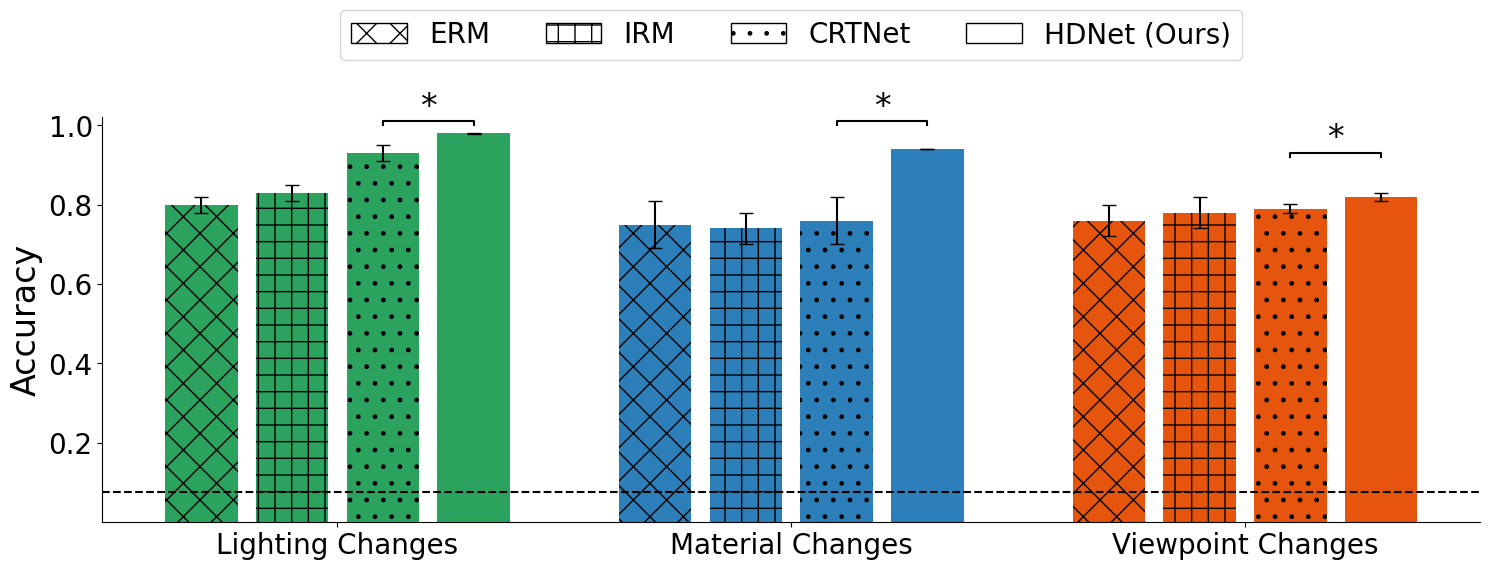

In [116]:
import numpy as np
import seaborn as sns

x = list(range(len(arch)))
W=0.8

plt.figure(figsize=(15,5))
plt.ylabel('Accuracy',fontsize=24)
# plt.title('Generalization to real-world transformations in HVD Dataset', fontsize=24, pad=70)
plt.yticks(ticks = [0.2,0.4, 0.6, 0.8, 1.0], labels = [0.2,0.4, 0.6, 0.8, 1.0], fontsize=20)

# plt.xticks(list(range(len(archs))),labels=archs,fontsize=10,rotation=90)
plt.xticks([1.5,6.5,11.5],labels=['Lighting Changes', 'Material Changes', 'Viewpoint Changes'],fontsize=20)

plt.bar(x, light,width=W,color=green,yerr=errs_light,hatch=['x','+','.',''],capsize=5)
plt.bar([i+5 for i in x], material,width=W,color=blue,yerr=errs_material,hatch=['x','+','.',''], capsize=5)
plt.bar([i+10 for i in x], viewpoint,width=W,color=red,yerr=errs_viewpoint, label=arch,hatch=['x','+','.',''],capsize=5)
plt.ylim(0,1.02)
add_significance_bar(2,3,1,0.01,'*')
add_significance_bar(7,8,1,0.01,'*')
add_significance_bar(12,13,0.92,0.01,'*')

random_chance = 1/13
plt.axhline(y=random_chance, color='black', linestyle='--', label='Chance')

sns.despine()
plt.tight_layout()
legend = plt.legend(handles=legend_handles, ncol=4,fontsize=20,loc='upper center')
legend.set_bbox_to_anchor((0.5, 1.3))
# plt.legend(loc='upper center',ncol=4,fontsize=20)

plt.savefig('paper_figures/generalization_on_hvd.pdf', bbox_inches='tight')
plt.show()

In [117]:
light_irm = [0.8304803675856307,
 0.8571428571428571,
 1.0,
 0.8888888888888888,
 0.25,
 0.8,
 0.8304803675856307,
 1.0,
 0.8304803675856307,
 0.6666666666666666,
 0.8421052631578947,
 1.0,
 1.0]

light_ = [0.989082396030426,
 0.9763926267623901,
 0.9695028066635132,
 0.9777464866638184,
 0.9909487962722778,
 0.990043580532074,
 0.9880431890487671,
 0.993859052658081,
 0.9839034080505371,
 0.9861030578613281,
 0.9779735803604126,
 0.9981380105018616,
 0.9963840842247009]

material_irm = [1.0,
 0.75,
 0.6,
 0.7894736842105263,
 0.75,
 0.4,
 0.7018208399787347,
 0.6666666666666666,
 0.0,
 0.7018208399787347,
 0.8888888888888888,
 1.0,
 0.875]


material_ = [0.9349467754364014,
 0.8493537902832031,
 0.9067965745925903,
 0.9060835242271423,
 0.9411764740943909,
 0.8971990346908569,
 0.9642040133476257,
 0.9158878326416016,
 0.9275653958320618,
 0.849567711353302,
 0.9030836820602417,
 0.9914422035217285,
 0.9816951751708984]
# material_ = [round(i,3) for i in material_]

# material_

viewpoint_irm = [1.0,
 0.6666666666666666,
 0.6,
 0.8571428571428571,
 0.42857142857142855,
 0.83,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5555555555555556,
 1.0,
 0.8571428571428571]

viewpoint_ = [0.8448100686073303,
 0.6355932354927063,
 0.788223147392273,
 0.7990255951881409,
 0.8337330222129822,
 0.7576419115066528,
 0.8598673343658447,
 0.8424437046051025,
 0.8133615851402283,
 0.8269230723381042,
 0.7848101258277893,
 0.9628725051879883,
 0.9426155090332031]

# viewpoint_crtnet = [0.71318305, 0.64905286, 0.76291323, 0.71619976, 0.79696244,
#        0.71542943, 0.89552242, 0.88102895, 0.75503713, 0.65559441,
#        0.75949365, 0.96446019, 0.96285111]

# viewpoint_ctcnet = 

In [118]:
# np.mean(viewpoint_irm)

In [119]:
with open('../DomainBed/LIGHTS/ANDMask/class_accs.p','rb') as F:
    lighting_andmask = pickle.load(F)

with open('../DomainBed/dg_all_envs/IRM/class_accs.p','rb') as F:
    viewpoint_andmask = pickle.load(F)

test_significance(viewpoint_andmask, viewpoint_)

0.652696352179865

In [120]:
test_significance_relative(light_irm, light_)

(True, 0.016607702767798903)

In [121]:
test_significance_relative(material_irm, material_)

(True, 0.010237921268330964)

In [122]:
test_significance_relative(crtnet_viewpoints, viewpoint_)

0.06481210817982923

In [123]:
test_significance_relative(ctcnet_viewpoints, crtnet_viewpoints)

(True, 0.04045181898938321)

In [124]:

# test_significance(ctcnet_viewpoints, viewpoint_irm)

In [125]:
import math

In [126]:
def clean_accs(accs):
    accs_ = [i for i in accs if not math.isnan(i)]
    mean = np.mean(accs_)
    accs__ = [0]*len(accs)
    for i in range(len(accs)):
        if math.isnan(accs[i]):
            accs__[i] = mean
        else:
            accs__[i] = accs[i]
    return accs__

In [127]:
# import math

In [128]:
# test_significance(clean_accs(lighting_andmask),light_)

# Style transfer vs Material

In [129]:
mat_vals = [0.7619353532791138,
 0.8367480635643005,
 0.8892835378646851,
 0.9061455130577087]

style_vals = [0.7619353532791138, 0.76, 0.77,0.76]

errs_mats =[expname_to_sem['1_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['2_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['3_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['4_style_hotswapped_material_50__unseen_materials_accuracies.json']]
errs_style_transfer =[expname_to_sem['1_transfer_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['2_transfer_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['3_transfer_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['4_transfer_style_hotswapped_material_50__unseen_materials_accuracies.json']]


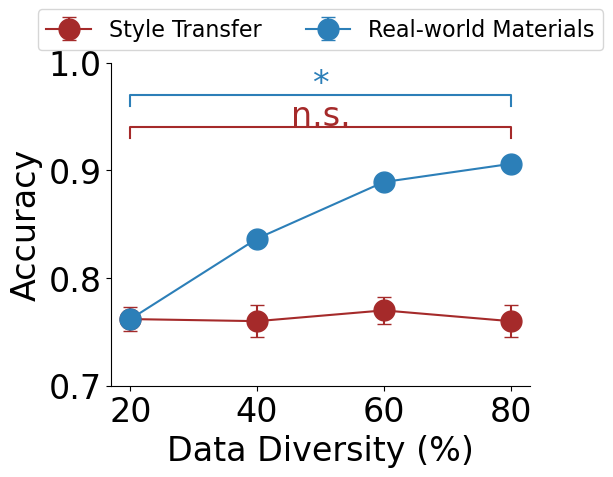

In [130]:
plt.figure(figsize=(6,5))
plt.errorbar(range(0,4), style_vals, marker='o',color='brown', markersize=15, label='Style Transfer', yerr = errs_style_transfer, capsize = 5)
plt.errorbar(range(0,4), mat_vals, marker='o',color=blue, markersize=15, label='Real-world Materials', yerr = errs_mats, capsize = 5)
# plt.plot(range(0,4), random_chance, linestyle='dashed',label='random chance',color='black', marker='o')

plt.ylim(0.7,1.0)
# plt.title('Generalization to OOD domains',fontsize=18, y=1.12);
plt.xlabel('Data Diversity (%)', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
# plt.legend(loc='lower right', bbox_to_anchor=(0.5, 1.2),ncol=3, fontsize=20, columnspacing=0.5)
plt.legend(bbox_to_anchor=(0.5,1.2),loc="upper center", fontsize=16,ncol=2)

plt.xticks(ticks = range(4), labels = [20,40,60,80], fontsize=24)
plt.yticks(ticks = [0.7, 0.8, 0.9, 1.0], labels = [0.7, 0.8, 0.9, 1.0], fontsize=24)

add_significance_bar(0,3,0.96,0.01,'*',line_color=blue,text_color=blue)
add_significance_bar(0,3,0.93,0.01,'n.s.',line_color='brown',text_color='brown')
sns.despine()
plt.tight_layout()
plt.savefig('paper_figures/material_vs_style_transfer_diversity.pdf', bbox_inches='tight')
plt.show()

In [131]:
material_significance = test_significance_relative(expname_to_accs['1_style_hotswapped_material_50__unseen_materials_accuracies.json'],expname_to_accs['4_style_hotswapped_material_50__unseen_materials_accuracies.json'])
style_significance = test_significance_relative(expname_to_accs['1_transfer_style_hotswapped_material_50__unseen_materials_accuracies.json'],expname_to_accs['4_transfer_style_hotswapped_material_50__unseen_materials_accuracies.json'])

In [132]:
material_significance

(True, 6.744846903328902e-05)

In [133]:
style_significance

0.5958992372542271

# Assymetric Diversity plot

In [134]:
semantic_ilab_matrix = np.array([[0.98, 0.78, 0.72], [0.65, 0.94, 0.55], [0.25, 0.23, 0.44]])

errs_lighting = [expname_to_sem['resnet_light__train_light_test_light_accuracies.json'], expname_to_sem['resnet_style__train_style_test_light_accuracies.json'], expname_to_sem['resnet_viewpoints__train_viewpoints_test_light_accuracies.json']]
errs_material = [expname_to_sem['resnet_light__train_light_test_style_accuracies.json'], expname_to_sem['resnet_style__train_style_test_style_accuracies.json'], expname_to_sem['resnet_viewpoints__train_viewpoints_test_style_accuracies.json']]
errs_viewpoint = [expname_to_sem['resnet_light__train_light_test_viewpoints_accuracies.json'], expname_to_sem['resnet_style__train_style_test_viewpoints_accuracies.json'], expname_to_sem['resnet_viewpoints__train_viewpoints_test_viewpoints_accuracies.json']]

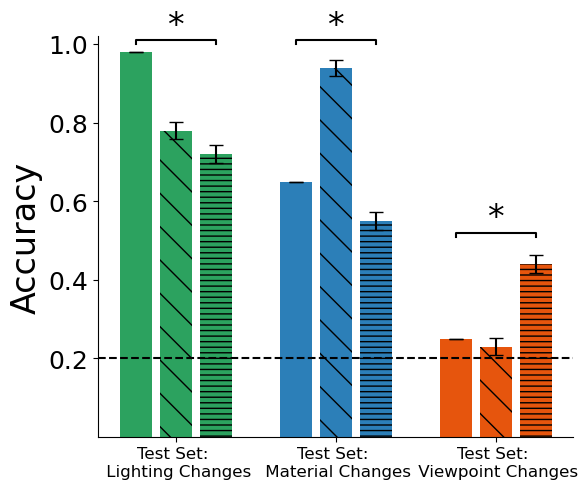

In [135]:
legend_handles = []
legend_handles.append(mpatches.Patch(facecolor='white', hatch='', label='Train Set: Lighting Changes',edgecolor='black'))
legend_handles.append(mpatches.Patch(facecolor='white', hatch="\\", label='Train Set: Material Changes',edgecolor='black'))
legend_handles.append(mpatches.Patch(facecolor='white', hatch='---', label='Train Set: Viewpoint Changes',edgecolor='black'))

import numpy as np
import seaborn as sns

x = list(range(len(semantic_ilab_matrix)))
W=0.8

plt.figure(figsize=(6,5))
plt.ylabel('Accuracy',fontsize=24)
# plt.title('Generalization across real-world \n transformations in Semantic iLab Dataset', fontsize=20, pad=50)
plt.yticks(ticks = [0.2, 0.4, 0.6, 0.8, 1.0], labels = [0.2, 0.4,0.6,0.8,1.0], fontsize=18)

# plt.xticks(list(range(len(archs))),labels=archs,fontsize=10,rotation=90)
plt.xticks([1,5,9],labels=['Test Set: \n Lighting Changes', 'Test Set: \n Material Changes', 'Test Set: \n Viewpoint Changes'],fontsize=12)

plt.bar(x, semantic_ilab_matrix[0],width=W,color=green, hatch=['','\\','---'], yerr = errs_lighting, capsize=5)
plt.bar([i+4 for i in x], semantic_ilab_matrix[1],width=W,color=blue,hatch=['','\\','---'], yerr = errs_lighting, capsize=5)
plt.bar([i+8 for i in x], semantic_ilab_matrix[2],width=W,color=red,hatch=['','\\','---'], yerr = errs_lighting, capsize=5)
plt.ylim(0,1.02)
add_significance_bar(0,2,1.,0.01,'*')
add_significance_bar(4,6,1.,0.01,'*')
add_significance_bar(8,10,0.51,0.01,'*')


random_chance = 1/5
plt.axhline(y=random_chance, color='black', linestyle='--', label='Chance')

sns.despine()
plt.tight_layout()
# legend = plt.legend(handles=legend_handles, ncol=1,fontsize=12,loc='upper center')
# legend.set_bbox_to_anchor((0.5, 1.2))
# plt.legend(loc='upper center',ncol=4,fontsize=20)
plt.savefig('paper_figures/generalization_across_transformations_ilab.pdf', bbox_inches='tight')
plt.show()

In [136]:
light_significance_1 = test_significance_relative(expname_to_accs['resnet_light__train_light_test_light_accuracies.json'],expname_to_accs['resnet_style__train_style_test_light_accuracies.json'])
light_significance_2 = test_significance_relative(expname_to_accs['resnet_light__train_light_test_light_accuracies.json'],expname_to_accs['resnet_viewpoints__train_viewpoints_test_light_accuracies.json'])



In [137]:
material_significance_1 = test_significance_relative(expname_to_accs['resnet_style__train_style_test_style_accuracies.json'],expname_to_accs['resnet_light__train_light_test_style_accuracies.json'])
material_significance_2 = test_significance_relative(expname_to_accs['resnet_style__train_style_test_style_accuracies.json'],expname_to_accs['resnet_viewpoints__train_viewpoints_test_style_accuracies.json'])


In [138]:
viewpoint_significance_1 = test_significance_relative(expname_to_accs['resnet_viewpoints__train_viewpoints_test_viewpoints_accuracies.json'],expname_to_accs['resnet_light__train_light_test_viewpoints_accuracies.json'])
viewpoint_significance_2 = test_significance_relative(expname_to_accs['resnet_viewpoints__train_viewpoints_test_viewpoints_accuracies.json'],expname_to_accs['resnet_style__train_style_test_viewpoints_accuracies.json'])


In [139]:
light_significance_1

(True, 0.00012926714700291195)

In [140]:
light_significance_2

(True, 9.480047022422972e-06)

In [141]:
material_significance_1

(True, 0.0007502969492900054)

In [142]:
material_significance_2

(True, 0.00011468151175908506)

In [143]:
viewpoint_significance_1

(True, 0.003366123506685882)

In [144]:
viewpoint_significance_2

(True, 0.0025244229963116704)

In [145]:
hvd_matrix = np.array([[0.98, 0.96, 0.73], [0.79, 0.94, 0.73], [0.74, 0.75, 0.83]])

errs_lighting = [expname_to_sem['three_hotswapped_light_50__unseen_lights_accuracies.json'], expname_to_sem['4_style_hotswapped_material_50__ood_lights_accuracies.json'], expname_to_sem['viewpoint_hotswapped_3__ood_lights_accuracies.json']]
errs_material = [expname_to_sem['three_hotswapped_light_50__ood_materials_accuracies.json'], expname_to_sem['4_style_hotswapped_material_50__unseen_materials_accuracies.json'], expname_to_sem['viewpoint_hotswapped_3__ood_materials_accuracies.json']]
errs_viewpoint = [expname_to_sem['three_hotswapped_light_50__ood_viewpoints_accuracies.json'], expname_to_sem['4_style_hotswapped_material_50__ood_viewpoints_accuracies.json'], expname_to_sem['viewpoint_hotswapped_3__unseen_viewpoints_accuracies.json']]

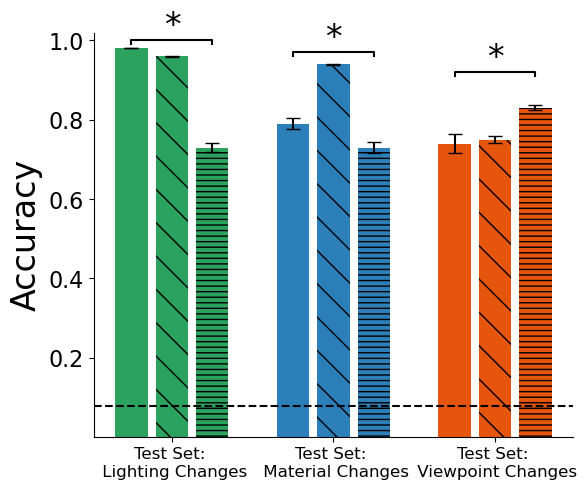

In [146]:
legend_handles = []
legend_handles.append(mpatches.Patch(facecolor='white', hatch='', label='Train Set: Lighting Changes',edgecolor='black'))
legend_handles.append(mpatches.Patch(facecolor='white', hatch='\\', label='Train Set: Material Changes',edgecolor='black'))
legend_handles.append(mpatches.Patch(facecolor='white', hatch='---', label='Train Set: Viewpoint Changes',edgecolor='black'))

import numpy as np
import seaborn as sns

x = list(range(len(hvd_matrix)))
W=0.8

plt.figure(figsize=(6,5))
plt.ylabel('Accuracy',fontsize=24)
# plt.title('Generalization across real-world \n transformations in HVD Dataset', fontsize=20, pad=50)
plt.yticks(ticks = [0.2, 0.4, 0.6, 0.8, 1.0], labels = [0.2, 0.4, 0.6, 0.8, 1.0], fontsize=16)

# plt.xticks(list(range(len(archs))),labels=archs,fontsize=10,rotation=90)
plt.xticks([1,5,9],labels=['Test Set: \n Lighting Changes', 'Test Set: \n Material Changes', 'Test Set: \n Viewpoint Changes'],fontsize=12)

plt.bar(x, hvd_matrix[0],width=W,color=green, hatch=['','\\','---'], yerr = errs_lighting, capsize=5)
plt.bar([i+4 for i in x], hvd_matrix[1],width=W,color=blue,hatch=['','\\','---'], yerr = errs_material, capsize=5)
plt.bar([i+8 for i in x], hvd_matrix[2],width=W,color=red,hatch=['','\\','---'], yerr = errs_viewpoint, capsize=5)
plt.ylim(0,1.02)

add_significance_bar(0,2,0.99,0.01,'*')
add_significance_bar(4,6,0.96,0.01,'*')
add_significance_bar(8,10,0.91,0.01,'*')

random_chance = 1/13
plt.axhline(y=random_chance, color='black', linestyle='--', label='Chance')

sns.despine()
plt.tight_layout()
# legend = plt.legend(handles=legend_handles, ncol=1,fontsize=12,loc='upper center')
# legend.set_bbox_to_anchor((0.5, 1.3))

plt.savefig('paper_figures/generalization_across_transformations_hvd.pdf', bbox_inches='tight')
plt.show()

In [147]:
light_significance_1 = test_significance_relative(expname_to_accs['three_hotswapped_light_50__unseen_lights_accuracies.json'],expname_to_accs['4_style_hotswapped_material_50__ood_lights_accuracies.json'])
light_significance_2 = test_significance_relative(expname_to_accs['three_hotswapped_light_50__unseen_lights_accuracies.json'],expname_to_accs['viewpoint_hotswapped_3__ood_lights_accuracies.json'])



In [148]:
material_significance_1 = test_significance_relative(expname_to_accs['three_hotswapped_light_50__ood_materials_accuracies.json'],expname_to_accs['4_style_hotswapped_material_50__unseen_materials_accuracies.json'])
material_significance_2 = test_significance_relative(expname_to_accs['three_hotswapped_light_50__ood_materials_accuracies.json'],expname_to_accs['viewpoint_hotswapped_3__ood_materials_accuracies.json'])



In [149]:
viewpoint_significance_1 = test_significance_relative(expname_to_accs['three_hotswapped_light_50__ood_viewpoints_accuracies.json'],expname_to_accs['4_style_hotswapped_material_50__ood_viewpoints_accuracies.json'])
viewpoint_significance_2 = test_significance(expname_to_accs['resnet_viewpoints__train_viewpoints_test_viewpoints_accuracies.json'],expname_to_accs['resnet_viewpoints__train_viewpoints_test_light_accuracies.json'])



In [150]:
light_significance_1

(True, 0.012234281562382297)

In [151]:
light_significance_2

(True, 2.458388924462877e-06)

In [152]:
material_significance_1

(True, 0.00021017752684576157)

In [153]:
material_significance_2

(True, 0.004255258846525094)

In [154]:
viewpoint_significance_1

(True, 0.007724589799167609)

In [493]:
viewpoint_significance_2

(True, 0.0016477675997079875)

# blur image

In [494]:
from PIL import Image, ImageFilter

In [495]:
image = Image.open('core/im_10.png')

In [496]:
# image.size

In [497]:
xmin = 300
ymin = 300
w = 220
h = 170

In [498]:
box = (int(xmin), int(ymin), int(xmin + w), int(ymin + h))
target_image = image.crop((int(xmin), int(ymin), int(xmin + w), int(ymin + h)))

In [499]:
for i in range(25):
    image = image.filter(ImageFilter.BLUR)

In [500]:
# image.paste(target_image, box)

In [501]:
target_image.save('core/im_10_cropped.png')

In [426]:
image.save('core/im_10_blurred.png')